<a href="https://colab.research.google.com/github/BIGBULL777/Capble-Intern-Project-Taxi-Time-LR/blob/main/Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")

In [4]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [26]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)


    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    radius = 6371
    distance = radius * c

    return distance


df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                        row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [6]:
df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance'],
      dtype='object')

In [7]:
df['distance']

0          1.498521
1          1.805507
2          6.385098
3          1.485498
4          1.188588
             ...   
1458639    1.225080
1458640    6.049836
1458641    7.824606
1458642    1.092564
1458643    1.134042
Name: distance, Length: 1458644, dtype: float64

In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
dtype: int64

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64


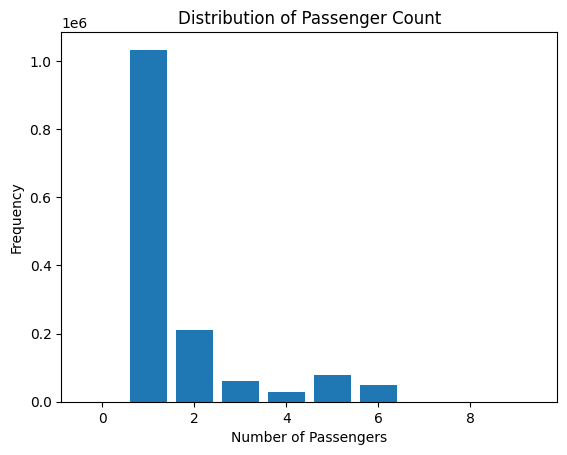

In [9]:
# Distribution of Passenger_count
passenger_count_distribution = df['passenger_count'].value_counts()
passenger_count_distribution = passenger_count_distribution.sort_index()
print(passenger_count_distribution)
# Plot the distribution using a bar plot
plt.bar(passenger_count_distribution.index,
passenger_count_distribution.values)
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.show()

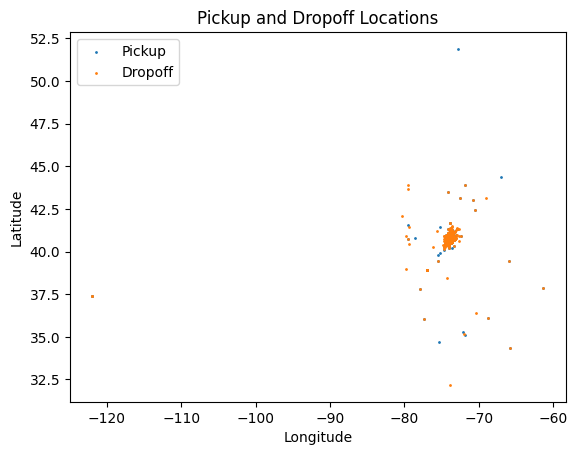

In [10]:
# Convert pickup_datetime and dropoff_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
# Distribution of trips across different dates and times
df['pickup_date'] = df['pickup_datetime'].dt.date
pickup_date_distribution = df['pickup_date'].value_counts()
df['pickup_hour'] = df['pickup_datetime'].dt.hour
pickup_hour_distribution = df['pickup_hour'].value_counts()
# Distribution of geographical coordinates
# Scatter plot for pickup and dropoff locations
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=1, label='Pickup')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=1, label='Dropoff')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations')
plt.legend()
plt.show()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


Text(0, 0.5, 'Frequency')

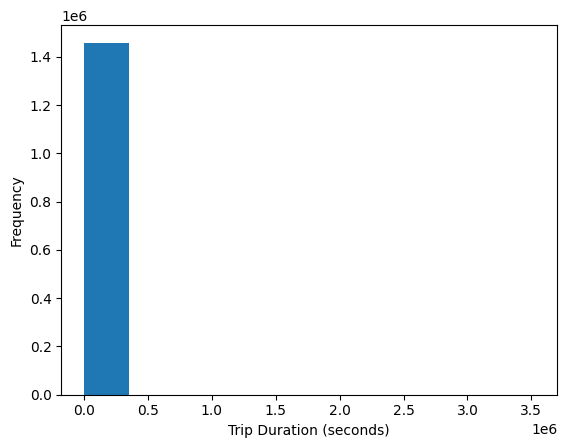

In [11]:
# Distribution of Store_and_fwd_flag
store_fwd_distribution = df['store_and_fwd_flag'].value_counts()
print(store_fwd_distribution)
# Distribution of Trip_duration
plt.hist(df['trip_duration'], bins=10)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')

In [12]:
plt.show()

In [14]:
column_name = 'trip_duration'
# Calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR)
Q1 = df[column_name].quantile(0.01)
Q3 = df[column_name].quantile(0.99)
IQR = Q3 - Q1
# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers using the IQR method
outliers = df[(df[column_name] < lower_bound) | (df[column_name] >
upper_bound)]
# Print the outliers
print(outliers)

                id  vendor_id     pickup_datetime    dropoff_datetime  \
531      id3307903          2 2016-02-20 04:03:06 2016-02-21 03:33:00   
1134     id1091477          2 2016-05-07 18:36:22 2016-05-08 18:32:11   
1865     id3431345          2 2016-06-07 12:58:48 2016-06-08 12:58:00   
3442     id1487069          2 2016-02-13 00:21:49 2016-02-14 00:19:05   
4172     id3674870          2 2016-03-18 11:54:20 2016-03-19 11:34:17   
...            ...        ...                 ...                 ...   
1455097  id2798196          2 2016-03-20 03:51:36 2016-03-21 00:00:00   
1456458  id2055880          2 2016-02-08 19:11:31 2016-02-09 19:08:44   
1457207  id1910950          2 2016-06-08 16:29:12 2016-06-09 16:11:03   
1457752  id1215198          2 2016-02-02 11:31:10 2016-02-03 11:29:44   
1458076  id2332290          2 2016-04-24 00:58:34 2016-04-25 00:56:16   

         passenger_count  pickup_longitude  pickup_latitude  \
531                    3        -74.008102        40.741489 

In [15]:
df = df[~df.index.isin(outliers.index)]

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['vendor_id_encoded'] = label_encoder.fit_transform(df['vendor_id'])

df['flag_encoded'] = label_encoder.fit_transform(df['store_and_fwd_flag'])

<ipython-input-18-422845983672>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


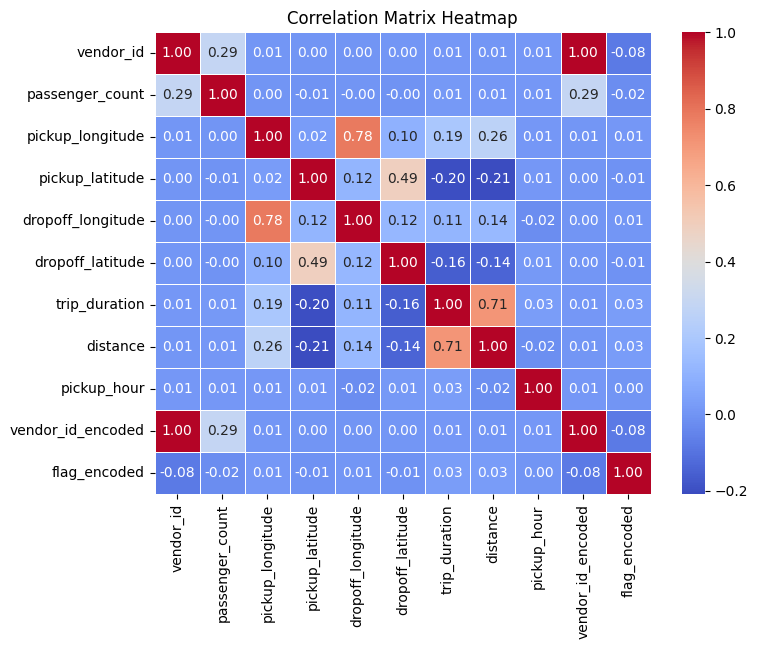

In [18]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['distance']]
y = df['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting on the test set
y_pred_linear = linear_model.predict(X_test)
# Evaluating the models
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression RMSE:", linear_rmse)


Linear Regression MAE: 300.86519406173005
Linear Regression RMSE: 429.26134625036656


In [23]:
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv")
test_df.head()
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [24]:
test_df['distance'] = test_df.apply(lambda row:
haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
row['dropoff_latitude'],
row['dropoff_longitude']), axis=1)

In [25]:
test_X = test_df[['distance']]
test_df['predicted_duration'] = linear_model.predict(test_X)
test_df['predicted_duration']

0          764.305649
1          765.643844
2          613.884495
3         1027.771251
4          577.820112
             ...     
625129     578.508965
625130    1124.613387
625131    1329.040777
625132    2606.025841
625133    1097.007500
Name: predicted_duration, Length: 625134, dtype: float64